In [7]:
import os
from matplotlib import pyplot as plt
from matplotlib.image import imread
from PIL import Image
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers import RMSprop

In [5]:
base_dir = 'dogs_breed'    
valid_dir = 'valid'
train_dir = 'train'
train_path = os.path.join(base_dir, train_dir)
valid_path = os.path.join(base_dir, valid_dir)
print(train_path)

dogs_breed\train


In [3]:
train_datagen = ImageDataGenerator(
 rescale=1./255,rotation_range=40,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip=True)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [4]:
train_gen = train_datagen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)
print(train_path)

Found 16469 images belonging to 120 classes.
dogs_breed\train


In [5]:
val_gen = val_datagen.flow_from_directory(
    valid_path,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 4111 images belonging to 120 classes.


# CNN

In [9]:
from tensorflow.keras import layers, Model
from tensorflow.keras.optimizers import RMSprop

def create_model(use_dropout :bool = False):
  img_input = layers.Input(shape=(150, 150, 3))
  x = layers.Conv2D(16, 3, activation='relu')(img_input)
  x = layers.MaxPooling2D(2)(x)
  x = layers.Conv2D(32, 3, activation='relu')(x)
  x = layers.MaxPooling2D(2)(x)
  x = layers.Conv2D(64, 3, activation='relu')(x)
  x = layers.MaxPooling2D(2)(x)
  x = layers.Flatten()(x)
  x = layers.Dense(512, activation='relu')(x)

  if use_dropout:
      x = layers.Dropout(0.5)(x)

  # Create output layer
  output = layers.Dense(120, activation='softmax')(x) # species number


  if 'model' in locals():
      del model 

  model_intra = Model(img_input, output)

  model_intra.summary()

  model_intra.compile(
      loss='categorical_crossentropy',
      optimizer=RMSprop(lr=0.001),
      metrics=['acc']
  )
  return model_intra

model = create_model()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0     

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def train_model(
    train_img_nb :int, 
    valid_img_nb :int, 
    batch_size :int,
    epochs :int, 
    use_data_augmentation :bool = False
):
    # All images will be rescaled by 1./255
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
    ) if use_data_augmentation else ImageDataGenerator(
        rescale=1./255
    )
    
    val_datagen = ImageDataGenerator(rescale=1./255)
    
    train_gen = train_datagen.flow_from_directory(
        train_path,
        target_size=(150, 150),
        batch_size=20,
        classes=os.listdir(train_path)
    )
    
    valid_generator = val_datagen.flow_from_directory(
        valid_path,
        target_size=(150, 150),
        batch_size=20,
        classes=os.listdir(valid_path)
    )

    history = model.fit(
        train_gen,
        steps_per_epoch=int(train_img_nb / batch_size),
        epochs=epochs,
        validation_data=valid_generator,
        validation_steps=int(valid_img_nb / batch_size),
    )
    return history

# history = train_model(
#     16469, 
#     4111, 
#     batch_size=20,
#     epochs=15
# )



# Data augmentation

In [8]:
model = create_model(use_dropout=True)
history = train_model(
    16469, 
    4111, 
    batch_size=25,
    epochs=15,
    use_data_augmentation=True
)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0   

In [9]:
def algo.history():
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Training and validation accuracy')
    plt.show()

    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(loss))
    plt.plot(epochs, loss, 'b')
    plt.plot(epochs, val_loss, 'r')
    plt.title('Training and validation loss')

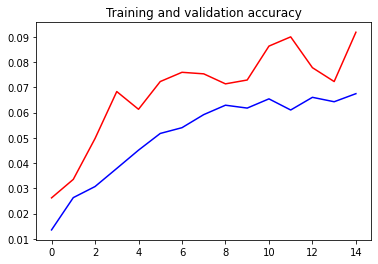

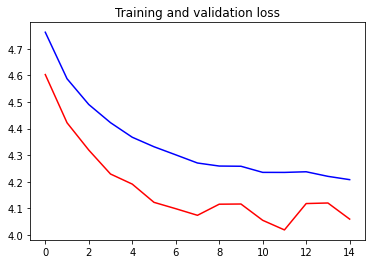

In [10]:
algo.history()

# Test

La race : n02112137-chow


,0
n02098286-West_Highland_white_terrier,1.0
n02105056-groenendael,0.0
n02097298-Scotch_terrier,0.0
n02092002-Scottish_deerhound,0.0
n02111277-Newfoundland,0.0
...,...
n02096177-cairn,0.0
n02109961-Eskimo_dog,0.0
n02110063-malamute,0.0
n02104029-kuvasz,0.0


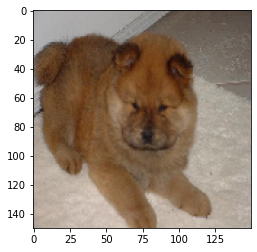

In [23]:
import random 
import os
from matplotlib import pyplot as plt
random_dir=random.choice(os.listdir(train_path))
random_file=random.choice(os.listdir(train_path + '/' + random_dir))

test = tf.keras.preprocessing.image.load_img(train_path + '/' + random_dir + '/' + random_file, target_size=(150, 150))

print('La race : ' + random_dir)
plt.imshow(test)


pred = model.predict((np.expand_dims(test,0)))
pd.DataFrame(pred, columns=os.listdir(train_path)).T.sort_values(by=0, ascending=False).round(2)